In [ ]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import warnings
warnings.simplefilter(action='ignore')

## Lecture 12 ##

# Joins

In [ ]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

In [ ]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

<br><br><br>

**Exercise:** Join drinks and discounts based on Cafe/Location.

In [ ]:
combined=''''''
combined

<br><br><br>

**Exercise:** Calculate the lowest rate you can get for each drink using the available coupons.
<br>
1. Create a column in the combined table showing discounted price
2. Select only the drinks and the discounted price
3. How to get the minimum price per drink

In [ ]:
discount_frac = 1-combined.column("Coupon % off")/100.0

(
    combined
    .
)

<br><br><br>
**Exercise:** What happens if I run the following? How many rows will it produce? Why?


In [ ]:
drinks.join('Cafe', drinks, 'Cafe')

## Bike Sharing ##

In [7]:
trip = Table.read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


In [ ]:
a=trip.column(3)
items=np.unique(a, return_counts=True)
# for k,v in zip(items[0],items[1]):
#     print(k,v)

<br><br><br>
**Exercise:** Create pivot table for Start Station and End Station. What value is being shown in each cell?

In [ ]:
#Recap of pivot



<br><br><br>
**Exercise:** Verify the output of the pivot table
1. Filter the table according to the start and end station and count entries

<br><br><br>
**Exercise:** Create pivot table showing average duration of the trips between the  Start Station and End Station ?

In [5]:
help(Table.pivot)

Help on function pivot in module datascience.tables:

pivot(self, columns, rows, values=None, collect=None, zero=None)
    Generate a table with a column for each unique value in ``columns``,
    with rows for each unique value in ``rows``. Each row counts/aggregates
    the values that match both row and column based on ``collect``.
    
    Args:
        ``columns`` -- a single column label or index, (``str`` or ``int``),
            used to create new columns, based on its unique values.
        ``rows`` -- row labels or indices, (``str`` or ``int`` or list),
            used to create new rows based on it's unique values.
        ``values`` -- column label in table for use in aggregation.
            Default None.
        ``collect`` -- aggregation function, used to group ``values``
            over row-column combinations. Default None.
        ``zero`` -- zero value to use for non-existent row-column
            combinations.
    
    Raises:
        TypeError -- if ``collect`` i

In [ ]:
# Group vs Pivot
## What if we want to get average duration per Start Station, End Station and Subscriber Type combination
(
    trip
    .select('Start Station','End Station','Subscriber Type','Duration')
    .....
)

## Distribution of Durations ##

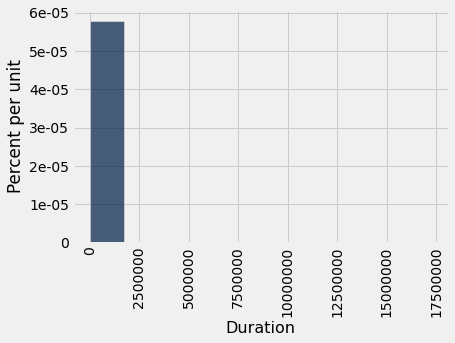

In [8]:
trip.hist('Duration')

In [9]:
trip.sort('Duration', descending=True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451
745640,611240,4/29/2015 9:41,University and Emerson,35,5/6/2015 11:28,San Antonio Shopping Center,31,196,Customer,81
635263,602338,2/8/2015 3:09,San Jose Civic Center,3,2/15/2015 2:28,San Jose Civic Center,3,9,Customer,89451
779645,594550,5/24/2015 13:33,San Pedro Square,6,5/31/2015 10:42,San Pedro Square,6,39,Customer,95118


<br><br><br>
**Exercise:** Create histogram with bins ranging from 0 to 1800 in increments of 250

In [ ]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

In [ ]:
# Approx percent of people who have 
# a ride duration between 250 and 500 seconds
# "between" = [250, 500) 


In [ ]:
# Exact answer: 

commute.where('', ).<>

In [ ]:
commute.num_rows

In [ ]:
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

# <br><br><br>
**Exercise:** Create histogram with more fine grained bins

In [ ]:
commute.hist('Duration', bins=50, unit='Second')

## Start and End Stations ##

In [ ]:
# Most common start station

starts = commute.group('Start Station').sort('count', descending=True)
starts

In [ ]:
# Numbers of trips between stations

commute.pivot('Start Station', 'End Station')

In [ ]:
# Average durations of trips between stations

commute.pivot('Start Station', 'End Station', values='Duration', collect=np.average)

## Fastest Trips between Stations ##

How can we find the fastest trip ever between each pair of stations?

In [ ]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

In [ ]:
# How would we calculate the best case scenario time between stations?

shortest = ..
shortest.show(5)

## Discussion question

Find the 5 stations closest to Civic Center BART by minimum trip time.

In [ ]:
from_cc = shortest.where(
    'Start Station', are.containing('Civic Center BART')).sort(
    'Duration min')
from_cc.take(np.arange(5))

In [ ]:
to_cc = shortest.where(
    'End Station', are.containing('Civic Center BART')).sort(
    'Duration min')
to_cc.take(np.arange(5))

In [ ]:
print(from_cc.num_rows,to_cc.num_rows)

## Maps ##

In [10]:
# Geographical data on the stations
stations = Table.read_table('station.csv').drop(4, 6)
stations

station_id,name,lat,long,landmark
2,San Jose Diridon Caltrain Station,37.3297,-121.902,San Jose
3,San Jose Civic Center,37.3307,-121.889,San Jose
4,Santa Clara at Almaden,37.334,-121.895,San Jose
5,Adobe on Almaden,37.3314,-121.893,San Jose
6,San Pedro Square,37.3367,-121.894,San Jose
7,Paseo de San Antonio,37.3338,-121.887,San Jose
8,San Salvador at 1st,37.3302,-121.886,San Jose
9,Japantown,37.3487,-121.895,San Jose
10,San Jose City Hall,37.3374,-121.887,San Jose
11,MLK Library,37.3359,-121.886,San Jose


In [16]:
sf_stations = stations.where('landmark', are.equal_to('San Francisco'))
sf_stations_map_data = (sf_stations
 .select('lat', 'long', 'name')
 .relabeled('name', 'labels')
                       )
sf_stations_map_data.show(3)

lat,long,labels
37.795,-122.4,Clay at Battery
37.7973,-122.398,Davis at Jackson
37.7942,-122.403,Commercial at Montgomery


In [17]:
Marker.map_table(sf_stations_map_data)

In [ ]:
Circle.map_table(sf_stations_map_data)

### Discussion question

Map all stations within 4 minutes (minimum ride time) of Civic Center.

In [18]:
from_cc.show(3)

NameError: name 'from_cc' is not defined

In [ ]:
sf_stations_map_data.show(3)

1. Filter out from from_cc all the stations that are with in 4 minutes ride from the Civic center
2. Join/Pivot ??
3. Markers.map_table

In [ ]:
close_cc = from_cc.<>
close_markers = (sf_stations_map_data
      <>
Marker.map_table(close_markers)

## Add Colors!

Choose marker colors by the minimum time from Civic Center

In [ ]:
minutes = np.round(from_cc.column("Duration min") / 60)
print(min(minutes), max(minutes))

In [ ]:
colors = Table().with_columns(
    "minutes", np.arange(15),
    "colors",  ["orange", "orange", 
                "lightgreen", "green", "darkgreen", 
                "lightgray", "lightgray", "lightgray", 
                "gray", "gray", "gray", "darkgray",
                "black", "black", "black"])

colors_cc = (from_cc
 .with_column("Minutes", minutes)
 .join("Minutes", colors, "minutes"))

colored_markers = (sf_stations_map_data
      .join('labels', colors_cc, 'End Station')
      .select('lat', 'long', 'labels', 'colors'))
Marker.map_table(colored_markers)

## Example Midterm Questions

For each of the following, write a Python expression that returns the given data:

1. The name of the station where most rentals ended

2. The number of stations for which the average duration of trips ending at that station was more than 10 minutes

3. The number of stations that have more than 500 starts and more than 500 ends.